In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
df=pd.read_csv("Classified Data")

In [4]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()
scaler.fit(df.drop("TARGET CLASS",axis=1))
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [7]:
import seaborn as sns
sns.pairplot(df,hue='TARGET CLASS')

Output hidden; open in https://colab.research.google.com to view.

TRAIN TEST SPLIT

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (scaled_features, df['TARGET CLASS'],test_size=0.30)

KNN


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
confusion_matrix(y_test,pred)

array([[130,  20],
       [  8, 142]])

In [11]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.87      0.90       150\n           1       0.88      0.95      0.91       150\n\n    accuracy                           0.91       300\n   macro avg       0.91      0.91      0.91       300\nweighted avg       0.91      0.91      0.91       300\n'

Choosing a K value 

In [12]:
accuracy_rate=[]
for i in range (1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
  accuracy_rate.append(score.mean())

Text(0, 0.5, 'Error Rate')

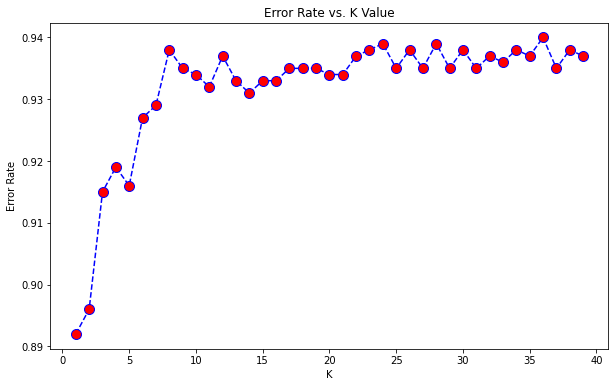

In [13]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [14]:
# error_rate = []

# # Will take some time
# for i in range(1,40):
    
#     knn = KNeighborsClassifier(n_neighbors=i)
#     score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
#     error_rate.append(1-score.mean())

In [15]:
# error_rate = []

# # Will take some time
# for i in range(1,40):
    
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train,y_train)
#     pred_i = knn.predict(X_test)
#     error_rate.append(np.mean(pred_i != y_test))

In [16]:
#WHEN K=1
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[130  20]
 [  8 142]]


              precision    recall  f1-score   support

           0       0.94      0.87      0.90       150
           1       0.88      0.95      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [17]:
#WHEN K=23
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[134  16]
 [  3 147]]


              precision    recall  f1-score   support

           0       0.98      0.89      0.93       150
           1       0.90      0.98      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

